In [43]:
# PLS- Partial Least Squares
# The Partial Least Squares regression (PLS) is a method which reduces the variables, 
# used to predict, to a smaller set of predictors. 

In [44]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict

In [45]:
data = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = data.copy()

In [46]:
df = df.dropna()


In [47]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [48]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
training = df.copy()

X_train: (197, 19)
X_test: (66, 19)
y_train: (197,)
y_test: (66,)


In [49]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [50]:
pls_model.coef_

C:\Users\Derya\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [51]:
# PLS Prediction

In [52]:
pls_model.predict(X_train)[:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [53]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [54]:
y_predict = pls_model.predict(X_train)

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 

In [56]:
np.sqrt(mean_squared_error(y_train,y_predict))

310.1167593109696

In [57]:
r2_score(y_train,y_predict)

0.5140424486535482

In [58]:
y_pred = pls_model.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

In [60]:
from sklearn import model_selection

In [61]:
cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

In [63]:
RMSE = []
for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train,
                                                       cv=10,
                                                       scoring="neg_mean_squared_error"))
    RMSE.append(score)

Text(0.5, 1.0, 'Salary')

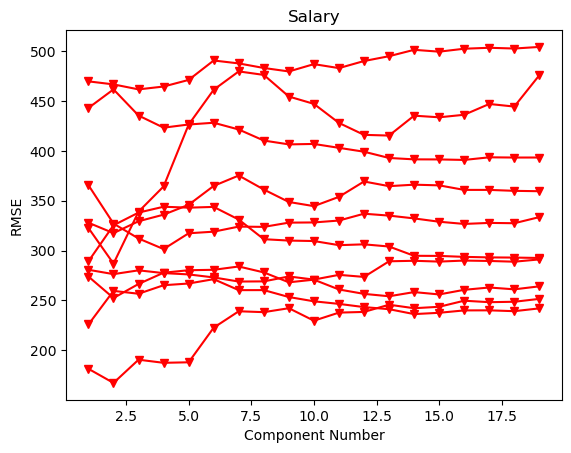

In [67]:
plt.plot(np.arange(1,X_train.shape[1]+1), np.array(RMSE),'-v',c="r")
plt.xlabel("Component Number")
plt.ylabel("RMSE")
plt.title("Salary")

In [68]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [69]:
y_predict = pls_model.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(y_test,y_predict))

398.09956327448526